**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [1]:
x = "C:/Users/nikky/Downloads/twitter_sentiment_data.csv"
df = pd.read_csv(x)
df.head()

NameError: name 'pd' is not defined

**EDA**

In [4]:
df.shape

(43943, 3)

In [5]:
df.columns.values

array(['sentiment', 'message', 'tweetid'], dtype=object)

In [6]:
df.describe()

,sentiment,tweetid
count,43943.000000,4.394300e+04
mean,0.853924,8.367966e+17
std,0.853543,8.568506e+16
min,-1.000000,5.926334e+17
25%,0.000000,7.970376e+17
50%,1.000000,8.402301e+17
75%,1.000000,9.020003e+17
max,2.000000,9.667024e+17


In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
43938    False
43939    False
43940    False
43941    False
43942    False
Length: 43943, dtype: bool

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
df.isnull()

,sentiment,message,tweetid
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
43938,False,False,False
43939,False,False,False
43940,False,False,False
43941,False,False,False


In [10]:
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [11]:
df.info

<bound method DataFrame.info of        sentiment                                            message  \
0             -1  @tiniebeany climate change is an interesting h...   
1              1  RT @NatGeoChannel: Watch #BeforeTheFlood right...   
2              1  Fabulous! Leonardo #DiCaprio's film on #climat...   
3              1  RT @Mick_Fanning: Just watched this amazing do...   
4              2  RT @cnalive: Pranita Biswasi, a Lutheran from ...   
...          ...                                                ...   
43938          1  Dear @realDonaldTrump,\nYeah right. Human Medi...   
43939          1  What will your respective parties do to preven...   
43940          2  RT @MikkiL: UN Poll Shows Climate Change Is th...   
43941          0  RT @taehbeingextra: i still can$q$t believe th...   
43942          1  @Likeabat77 @zachhaller \n\nThe wealthy + foss...   

                  tweetid  
0      792927353886371840  
1      793124211518832641  
2      793124402388832256  
3  

In [12]:
df2 = df.copy()
df2.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


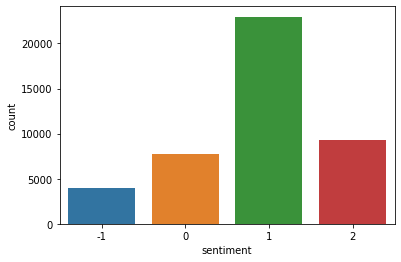

In [13]:
sns.countplot(x = 'sentiment', data = df)


**Data Cleaning**

In [21]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import re
# Creating function to clean the tweets
def cleanData(data):
  data = re.sub('@[A-Za-z0–9]+', '', data) #Removing @mentions
  data = re.sub('#', '', data) # Removing '#' hash tag
  data = re.sub('RT[\s]+', '', data) # Removing R
  data = re.sub('https?:\/\/\S+', '', data) # Removing hyperlink
  data = re.sub('\d+', '', data) ## Removing numeric values
  data = data.lower()
  data = re.sub(r'[^a-zA-Z]', ' ', data)
  data = data.split()
  return data

# Show the cleaned tweets
df2['message'] = df2['message'].apply(cleanData).apply(str)

# Show the cleaned tweets
df2.head()

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


TypeError: expected string or bytes-like object

In [18]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def cleantext(text):
    wn = nltk.WordNetLemmatizer()
    stopword = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    lower = [word.lower() for word in tokens]
    no_stopwords = [word for word in lower if word not in stopword]
    lemm_text = [wn.lemmatize(word) for word in no_stopwords]
    clean_text = lemm_text
    clean_text = clean_text
    return clean_text

df2["message"] = df2["message"].apply(cleantext)

print(df2['message'].head()) 

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


TypeError: expected string or bytes-like object

In [ ]:
data = df2
data.to_csv("first.csv")

In [ ]:
data = pd.read_csv("first.csv")
x = data['message']
y = data['sentiment']

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10000)
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[0:43942, 0].values

In [ ]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split  
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
import wordcloud 
from wordcloud import WordCloud
from collections import Counter
def generate_wordcloud(words,sentiment):
    plt.figure(figsize=(16,12))
    wc = WordCloud(background_color="white", max_words=150, max_font_size=40)
    wc.generate(words)
    plt.title("Most common {} words".format(sentiment), fontsize=20)
    plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), alpha=0.98)
    plt.axis('off')
    
df3=df.head(1000)
print("Processing data...")
df3['cleantext']=df3['message'].map(cleantext)
df3['clean_text']=df3['cleantext'].apply(lambda x: " ".join([str(word) for word in x]))

print("Creating word clouds...")
positive_words=" ".join(df3[df3.sentiment==1]['clean_text'].values)
negative_words=" ".join(df3[df3.sentiment==-1]['clean_text'].values)

generate_wordcloud(positive_words,"positive")
generate_wordcloud(negative_words,"negative")